# Decision Tree

```{note}
Decision tree split node by one feature at each step.<br/>
ID3 split according to information gain.<br/>
C4.5 split according to information gain ratio.<br/>
CART split according to square error & gini.<br/>
Pruning tries to minimize leaves entropy and model's complexity at the same time.
```

## Information Gain ID3

Suppose we have a classification problem, dataset $D=\{(x^{(1)}, y^{(1)}),...,(x^{(n)}, y^{(n)})\}$, $y^{(i)} \in \left\{1,...,k\right\}$.

Then the entropy of $D$ which measures uncertainty:

$$H(D) = E(-\log{p_{i}}) = -\sum_{i=1}^{k}p_{i}\log{p_{i}}$$

```{image} ../images/entropy.png
:alt: entropy
:width: 500px
:align: center
```

Assume we partition $D$ according to feature $A$ into $D_{1},...,D_{m}$, then the entropy of $D$ after knowing $A$:

$$H(D|A)=\sum_{i=1}^{m}\frac{\#D_{i}}{\#D}H(D_{i})$$

Information gain is uncertainty loss:

$$g(D,A) = H(D) - H(D|A)$$

Decision Tree ID3 choose feature $A$ that maximize $g(D,A)$ until:

1. subset is empty
2. information gain $g(D,A)\le\epsilon$

## Information Gain Ratio C4.5

Information gain prefer feature $A$ such that $\#A$ is large, more precisely,

$$H_{A}(D) =-\sum_{i=1}^{n}\frac{\#D_{i}}{\#D}\log\frac{\#D_{i}}{\#D}$$

is large.

Information gain ratio fix this by dividing $H_{A}(D)$:

$$g_{R}(D,A)=\frac{g(D,A)}{H_{A}(D)}$$

## CART-classification and regression tree

For regression problem, we try to find feature $j$ and cutting point $s$ that minimize the square error:

$$\underset{j,s}{min}\left[\underset{c_{1}}{min}\sum_{x_{i} \in R_{1}(j, s)}(y_{i} - c_{1})^{2} + \underset{c_{2}}{min}\sum_{x_{i} \in R_{2}(j, s)}(y_{i} - c_{2})^{2}\right]$$

For classification problem CART uses gini:

$$\mbox{Gini}(D) = E(1 - p_{i}) = \sum_{i=1}^{k}p_{i}(1 - p_{i})$$

```{image} ../images/entropy_gini.png
:alt: entropy_gini
:width: 500px
:align: center
```

## Pruning

Total entropy of these leaves:

$$C(T) = \sum_{t=1}^{\left | T \right |} \left | T_{t} \right |H(T_{t})$$

We want these minimize this entropy, and at the same time limit model's complexity.

Loss function:

$$C_{\alpha}(T) = C(T) + \alpha\left | T \right |$$

If pruning a node result in a decrease of the loss function, then pruning the node.

## Examples

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

In [2]:
"""hyperparameters"""
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion="entropy",  # default gini
                                  # maximum depth of that tree
                                  max_depth=3,
                                  # maximum number of leaf nodes
                                  max_leaf_nodes=15,
                                  # maximum number of features when splitting each node
                                  max_features=2,
                                  # min number of samples of a node before it can split
                                  min_samples_split=8,
                                  # min number of samples of a leaf node
                                  min_samples_leaf=3,
                                  # same as min_samples_leaf, but by weight frac
                                  min_weight_fraction_leaf=0.01)
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=2,
                       max_leaf_nodes=15, min_samples_leaf=3,
                       min_samples_split=8, min_weight_fraction_leaf=0.01)

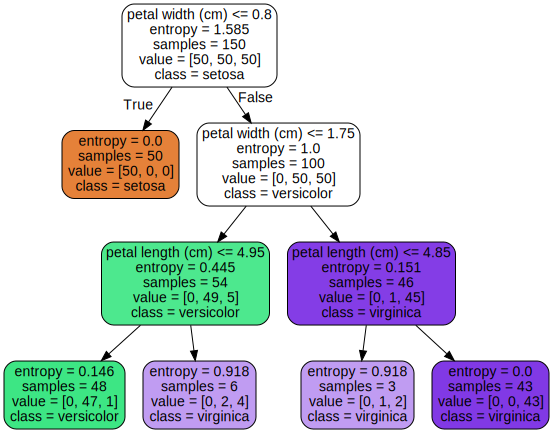

In [3]:
"""visualize using graphviz, need 1.pip install graphviz, 2.brew install graphviz"""
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
                out_file="iris_tree.dot",
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )

Source.from_file("iris_tree.dot")

### Grid Search

In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = [{"max_leaf_nodes": [2, 5], "min_samples_split": [3, 4]}]

clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=3, verbose=3)
grid_search.fit(X, y)
grid_search.best_estimator_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.660, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.660, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=3, score=0.660, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=4 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=4, score=0.660, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=4 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=4, score=0.660, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=4 ...........................
[CV]  max_leaf_nodes=2, min_samples_split=4, score=0.660, total=   0.0s
[CV] max_leaf_nodes=5, min_samples_split=3 ...........................
[CV]  max_l

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished


DecisionTreeClassifier(max_leaf_nodes=5, min_samples_split=4)